In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import IPython
import IPython.display

# SƠ LƯỢC DỮ LIỆU

In [191]:
df = pd.read_csv("data\MWG.csv", index_col=0).reset_index()
print(f"Dữ liệu bao gồm {df.shape[0]} dòng và {df.shape[1]} cột:")
print ('Mẫu bảng dữ liệu:\n')
df.head()

Dữ liệu bao gồm 250 dòng và 9 cột:
Mẫu bảng dữ liệu:



,Ngày,Tổng KLGD,Tổng GTGD,Vốn hóa TT,Đóng cửa,+/- giá,+/- % giá,KL,GT
0,2023-04-10,10110496,415900,59633,40750,1750.0,4.49,5323600,216286
1,2023-04-07,2661000,105114,57072,39000,-100.0,-0.26,2032200,78830
2,2023-04-06,2531100,101826,57218,39100,-650.0,-1.64,1971300,78034
3,2023-04-05,1735900,68838,58169,39750,-50.0,-0.13,1735900,68838
4,2023-04-04,3133300,124141,58242,39800,800.0,2.05,3133300,124141


In [192]:
df = df.rename(columns={"Ngày": "date", "Tổng KLGD": "KLGD", "Tổng GTGD": "GTGD", "Vốn hóa TT": "capital", "Đóng cửa": "close_price", "+/- giá": "daily_return", "+/- % giá": "daily_return_price"})

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                250 non-null    object 
 1   KLGD                250 non-null    int64  
 2   GTGD                250 non-null    int64  
 3   capital             250 non-null    int64  
 4   close_price         250 non-null    int64  
 5   daily_return        237 non-null    float64
 6   daily_return_price  237 non-null    float64
 7   KL                  250 non-null    int64  
 8   GT                  250 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 17.7+ KB


In [194]:
df.describe()

,KLGD,GTGD,capital,close_price,daily_return,daily_return_price,KL,GT
count,2.500000e+02,2.500000e+02,250.000000,250.000000,237.000000,237.000000,2.500000e+02,250.000000
mean,3.626474e+06,2.406004e+05,81895.600000,69790.000000,-145.358650,-0.211857,2.814555e+06,186529.972000
std,2.308783e+06,1.874786e+05,19825.652639,37412.856712,2343.079328,2.932655,1.570086e+06,121282.989449
min,5.777000e+05,4.609500e+04,51083.000000,37700.000000,-10900.000000,-7.000000,5.421000e+05,34268.000000
25%,2.232425e+06,1.228832e+05,62779.000000,43012.500000,-1000.000000,-1.640000,1.669900e+06,89961.750000
50%,2.980050e+06,1.866065e+05,84236.500000,59000.000000,-100.000000,-0.130000,2.540100e+06,160588.000000
75%,4.322358e+06,3.164162e+05,99769.000000,72000.000000,850.000000,1.460000,3.682825e+06,252570.000000
max,1.368460e+07,2.045754e+06,117270.000000,160200.000000,8600.000000,6.990000,1.084750e+07,778223.000000


Rename columns

In [195]:
df.columns

Index(['date', 'KLGD', 'GTGD', 'capital', 'close_price', 'daily_return',
       'daily_return_price', 'KL', 'GT'],
      dtype='object')

Feature engineer with date time

In [196]:
# Convert the date column to a pandas datetime object
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df = df.sort_values(by='date', ascending=True, ignore_index = True)
# df.drop(["date"], axis = 1, inplace = True)

In [197]:
df.head()

,date,KLGD,GTGD,capital,close_price,daily_return,daily_return_price,KL,GT
0,2022-04-12,4276300,656745,111780,152700,2700.0,1.80,2644500,394841
1,2022-04-13,12958400,2045754,114342,156200,3500.0,2.29,3406000,520444
2,2022-04-14,2992800,477771,116758,159500,3300.0,2.11,2925900,467335
3,2022-04-15,2959800,480101,117270,160200,700.0,0.44,2339800,374329
4,2022-04-18,2933800,474702,117270,160200,NaN,NaN,2616900,420385


# TRAINING

Fill missing values = 0

In [198]:
fill_cols  = ["daily_return","daily_return_price"]
imputer =  SimpleImputer(missing_values=np.nan, fill_value=0)
for col in fill_cols:
    df[col] = imputer.fit_transform(df[[col]])

MA price

In [199]:
ma_day = [10, 20]

for ma in ma_day:
    column_name = f"MA{ma}"
    df[column_name] = df['close_price'].rolling(ma).mean()

In [201]:
df.tail()

,date,KLGD,GTGD,capital,close_price,daily_return,daily_return_price,KL,GT,MA10,MA20
245,2023-04-04,3133300,124141,58242,39800,800.0,2.05,3133300,124141,38555.0,38905.0
246,2023-04-05,1735900,68838,58169,39750,-50.0,-0.13,1735900,68838,38735.0,38922.5
247,2023-04-06,2531100,101826,57218,39100,-650.0,-1.64,1971300,78034,38865.0,38877.5
248,2023-04-07,2661000,105114,57072,39000,-100.0,-0.26,2032200,78830,38970.0,38840.0
249,2023-04-10,10110496,415900,59633,40750,1750.0,4.49,5323600,216286,39235.0,38907.5


In [166]:
df = df.dropna()

In [167]:
#Extract date
date_time = pd.to_datetime(df.pop('date'))

In [168]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

week = 7*24*60*60
month = 30*24*60*60

df['week sin'] = np.sin(timestamp_s * (2 * np.pi / week))
df['week cos'] = np.cos(timestamp_s * (2 * np.pi / week))
df['month sin'] = np.sin(timestamp_s * (2 * np.pi / month))
df['month cos'] = np.cos(timestamp_s * (2 * np.pi / month))

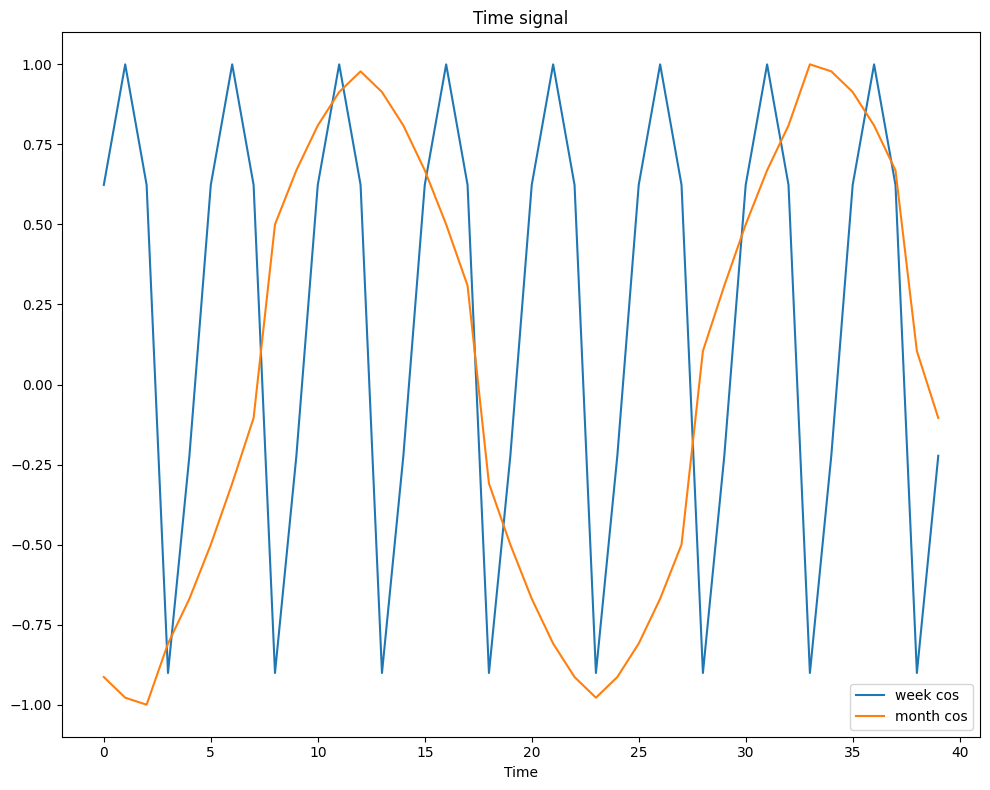

In [169]:
plt.figure(figsize=(10, 8))

plt.plot(np.array(df['week cos'][:40]), label ='week cos')
plt.plot(np.array(df['month cos'][:40]), label = 'month cos')
plt.legend()
plt.xlabel('Time')
plt.title('Time signal')

plt.tight_layout()

In [170]:
# Get the number of rows to train the model on
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
print ('len(train_df)',len(train_df))

len(train_df) 161


In [171]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

print ('train_df\n',train_df.head())

train_df
         KLGD      GTGD   capital  close_price  daily_return  \
19 -1.065288 -0.185466  0.929035     2.130118      0.432275   
20 -0.927021  0.082504  0.643726     1.925342     -2.725981   
21 -0.029386  1.931033  0.241661     1.636794     -3.862952   
22 -1.166224 -0.561799  0.150889     1.571638     -0.831027   
23 -1.323283 -0.872370  0.522658     1.838467      3.674750   

    daily_return_price        KL        GT      MA10      MA20  week sin  \
19            0.275411 -1.221604 -0.442143  2.121636  2.113246 -0.791311   
20           -1.429388 -0.894966  0.228203  2.078140  2.086451  0.453594   
21           -2.147198 -0.263524  1.417142  2.011386  2.040915  1.698499   
22           -0.468035 -1.120023 -0.379015  1.944934  1.987472 -0.237276   
23            2.310274 -1.289042 -0.704081  1.891773  1.945596 -1.098777   

    week cos  month sin  month cos  
19  0.573079   0.655041  -1.258201  
20  1.117520   0.370800  -1.348295  
21  0.573079   0.073568  -1.378770  
22 -1.

Make sliding window

In [172]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [173]:
OUT_STEPS = 5
input_width =15 
multi_window = WindowGenerator(input_width=input_width,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS,label_columns = ['close_price'])
multi_window

Total window size: 20
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [15 16 17 18 19]
Label column name(s): ['close_price']

Split Window

In [174]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

WindowGenerator.split_window = split_window

In [175]:
# Example for split window
example_window = tf.stack([np.array(train_df[:multi_window.total_window_size]),
                           np.array(train_df[50:50+multi_window.total_window_size]),
                           np.array(train_df[100:100+multi_window.total_window_size])])

example_inputs, example_labels = multi_window.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 20, 14)
Inputs shape: (3, 15, 14)
Labels shape: (3, 5, 1)


Plot

In [176]:
def plot(self, model=None, plot_col='close_price', max_subplots=3):
    
    inputs, labels = self.split_window(example_window)
    plt.figure(figsize=(20, 10))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [day]')

WindowGenerator.plot = plot

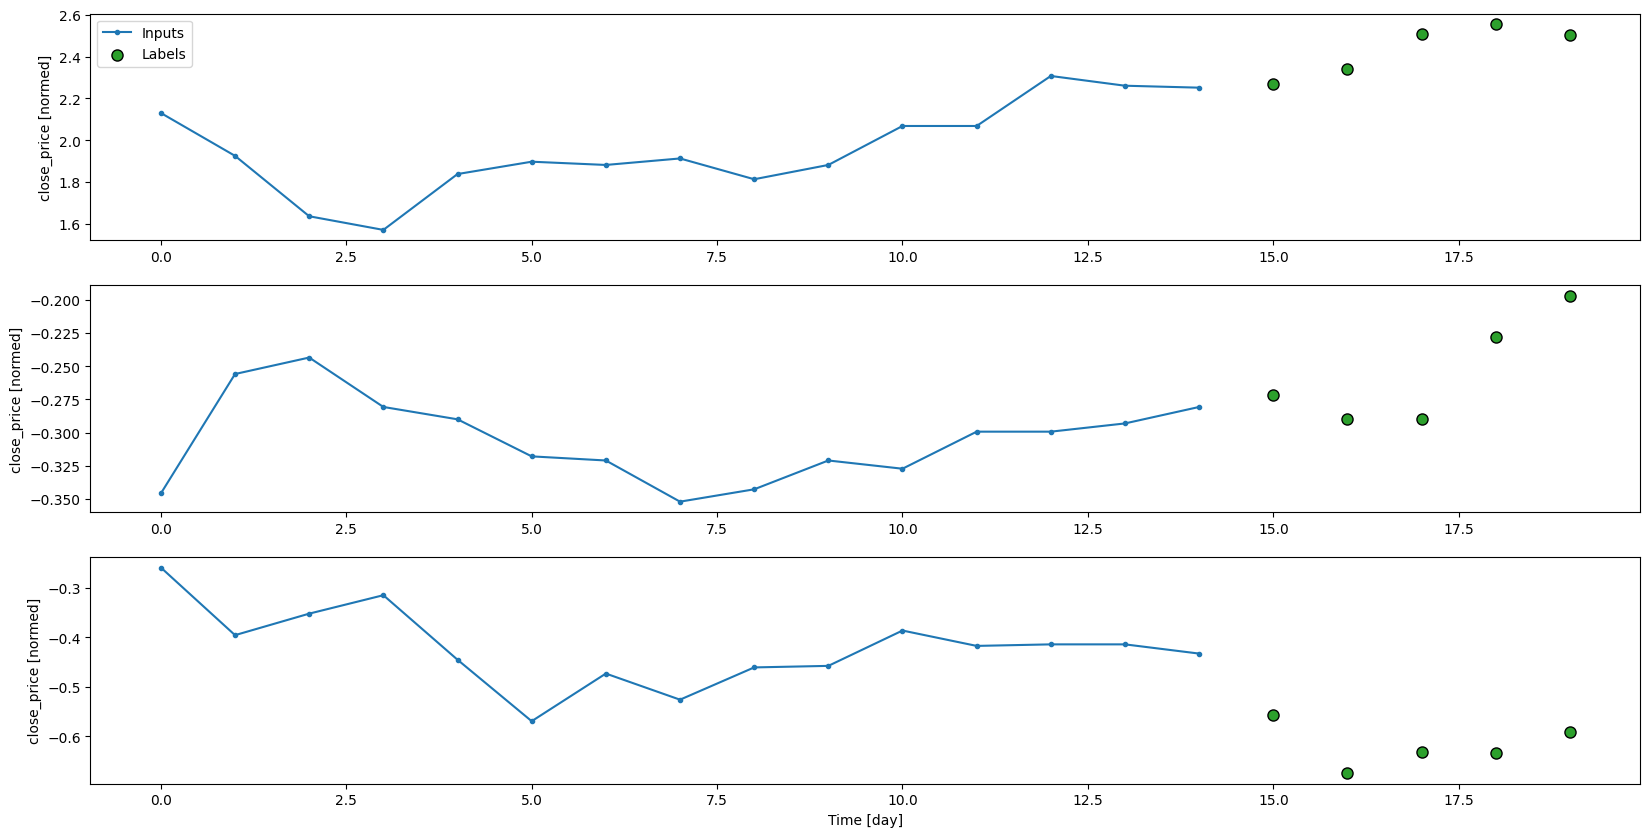

In [177]:
multi_window.plot()

Create dataset

In [178]:
def make_dataset(self, data): #data lấy liên tục 
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,#to avoid sequence bias
      batch_size=32,)

    ds = ds.map(self.split_window)

    return ds

WindowGenerator.make_dataset = make_dataset

In [179]:
@property
def train(self):
    return self.make_dataset(self.train_df)

@property
def val(self):
    return self.make_dataset(self.val_df)

@property
def test(self):
    return self.make_dataset(self.test_df)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [180]:
for inputs, labels in multi_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {inputs.shape}')
    print(f'Labels shape (batch, time, features): {labels.shape}')

Inputs shape (batch, time, features): (32, 15, 14)
Labels shape (batch, time, features): (32, 5, 1)


In [181]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 15, 14), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

Build and Train model

In [182]:
tf.keras.backend.clear_session()
MAX_EPOCHS = 100

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

def compile_and_fit(model, window, patience=20):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    # Set the learning rate scheduler
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

        
    model.compile(#loss=tf.keras.losses.MeanSquaredError()
                  loss=tf.keras.losses.Huber(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError(),
                         tf.keras.metrics.RootMeanSquaredError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping,lr_schedule],verbose=1)
    return history

In [183]:
def plot_train (history):
    # list all data in history
    print(history.history.keys())

    # summarize history for loss

    fig, ax = plt.subplots()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()

Simple CNN

In [184]:
CONV_WIDTH =3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

1/1 [==============================] - 0s 30ms/step - loss: 0.0175 - mean_absolute_error: 0.1555 - root_mean_squared_error: 0.1871
dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error', 'lr'])


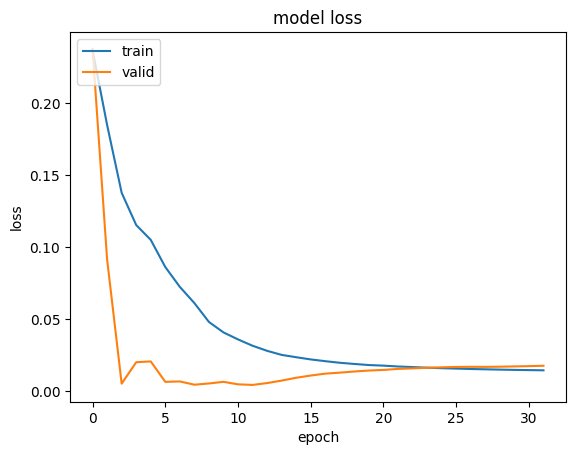

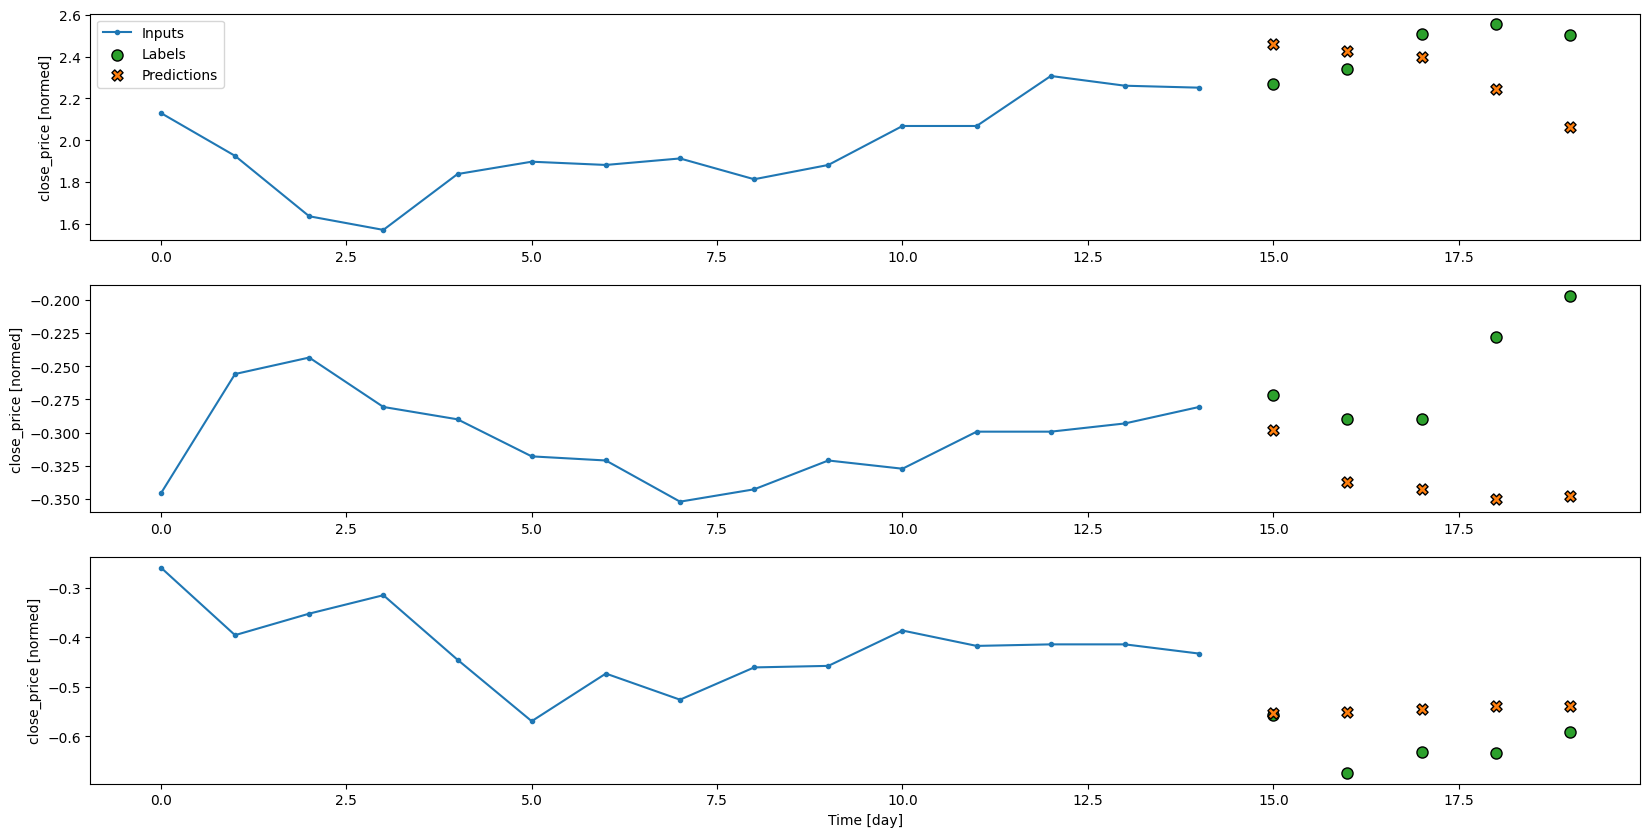

In [185]:
multi_conv_history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance = {}
multi_performance = {}

IPython.display.clear_output()

multi_val_performance['Simple Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Simple Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
plot_train(multi_conv_history)
multi_window.plot(multi_conv_model)

In [186]:
multi_conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 3, 14)             0         
                                                                 
 conv1d (Conv1D)             (None, 1, 256)            11008     
                                                                 
 dense (Dense)               (None, 1, 70)             17990     
                                                                 
 reshape (Reshape)           (None, 5, 14)             0         
                                                                 
Total params: 28,998
Trainable params: 28,998
Non-trainable params: 0
_________________________________________________________________


Multi LSTM

1/1 [==============================] - 0s 152ms/step - loss: 0.0082 - mean_absolute_error: 0.1104 - root_mean_squared_error: 0.1280
dict_keys(['loss', 'mean_absolute_error', 'root_mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_root_mean_squared_error', 'lr'])


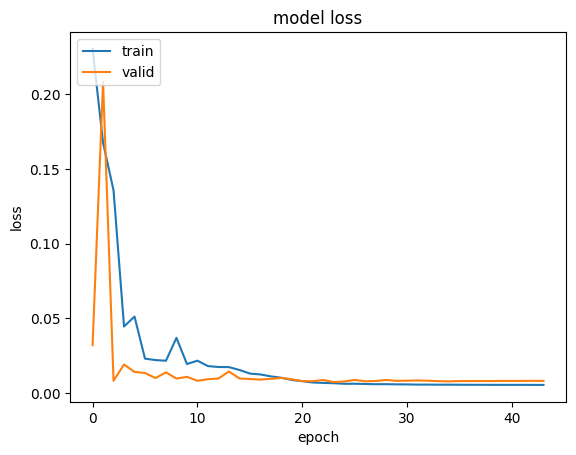

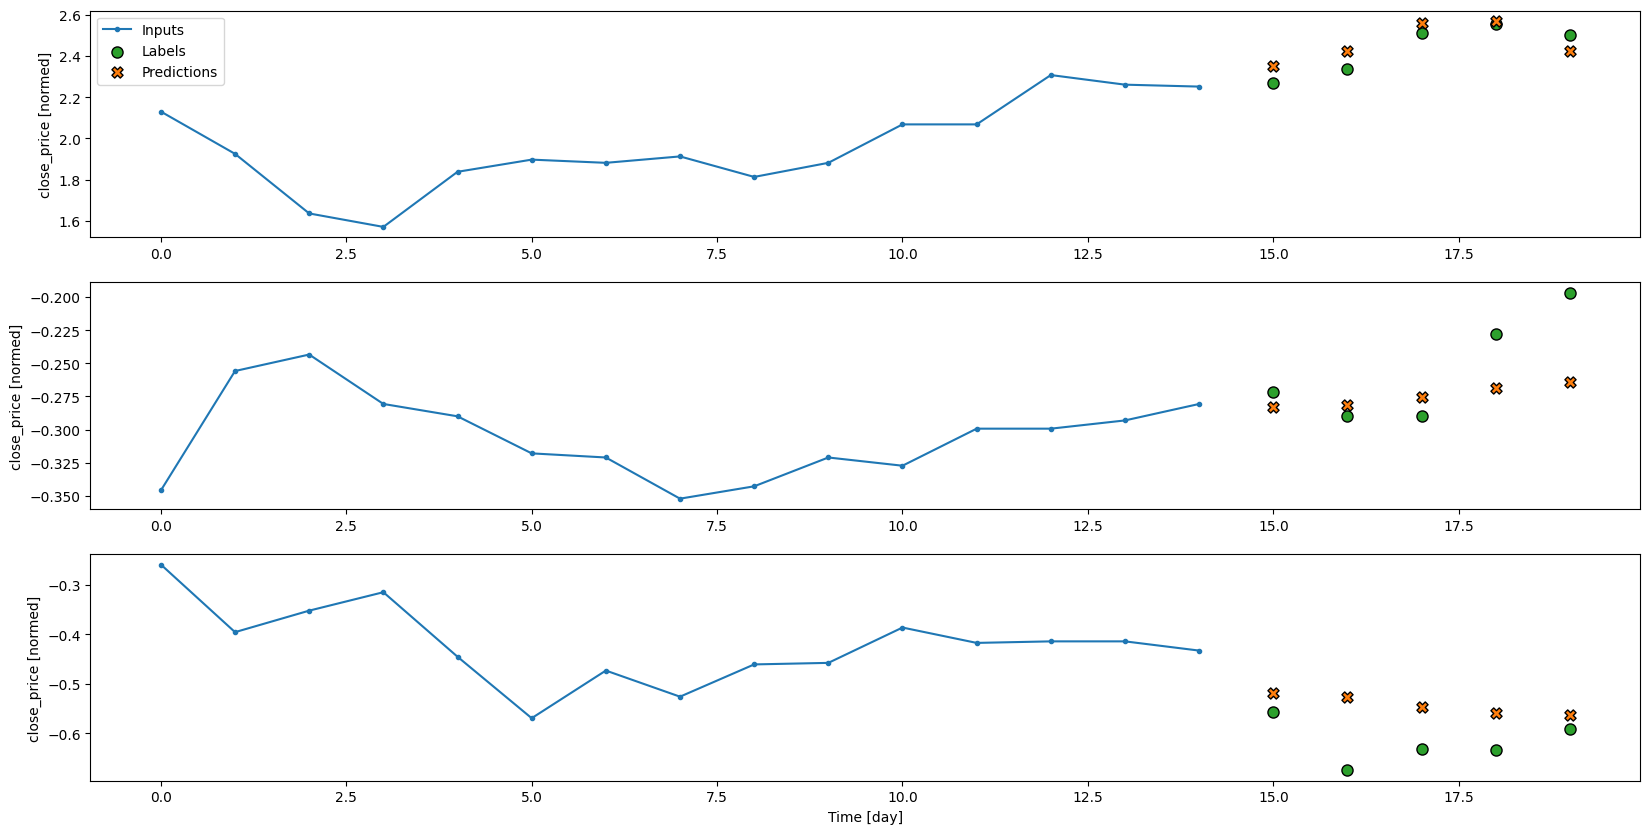

In [187]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(1024, return_sequences=True),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.LSTM(1024, return_sequences=False),
    
    tf.keras.layers.Dense(512, activation = 'relu'), 
    
    tf.keras.layers.Dense(256),
    
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history_multi_lstm = compile_and_fit(multi_lstm_model, multi_window)
IPython.display.clear_output()
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
plot_train(history_multi_lstm)
multi_window.plot(multi_lstm_model)

In [188]:
multi_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 1024)          4255744   
                                                                 
 lstm_1 (LSTM)               (None, 1024)              8392704   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 70)                17990     
                                                                 
 reshape_1 (Reshape)         (None, 5, 14)             0         
                                                                 
Total params: 13,322,566
Trainable params: 13,322,566


In [236]:
example_window = tf.stack([np.array(train_df[:multi_window.total_window_size]),
                           np.array(train_df[50:50+multi_window.total_window_size]),
                           np.array(train_df[100:100+multi_window.total_window_size])])
print(example_window.shape)

(3, 20, 14)


In [237]:
test_window = tf.stack([np.array(test_df[0:0+multi_window.total_window_size])])
# test_window = np.expand_dims(test_window, axis=0)
print(test_window.shape)


(1, 20, 14)


In [238]:
test_df.shape

(24, 14)

In [239]:
def plot_test(self, model=None, plot_col='close_price', max_subplots=1):
    
    inputs, labels = self.split_window(test_window)
    plt.figure(figsize=(20, 10))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [day]')

WindowGenerator.plot_test = plot_test

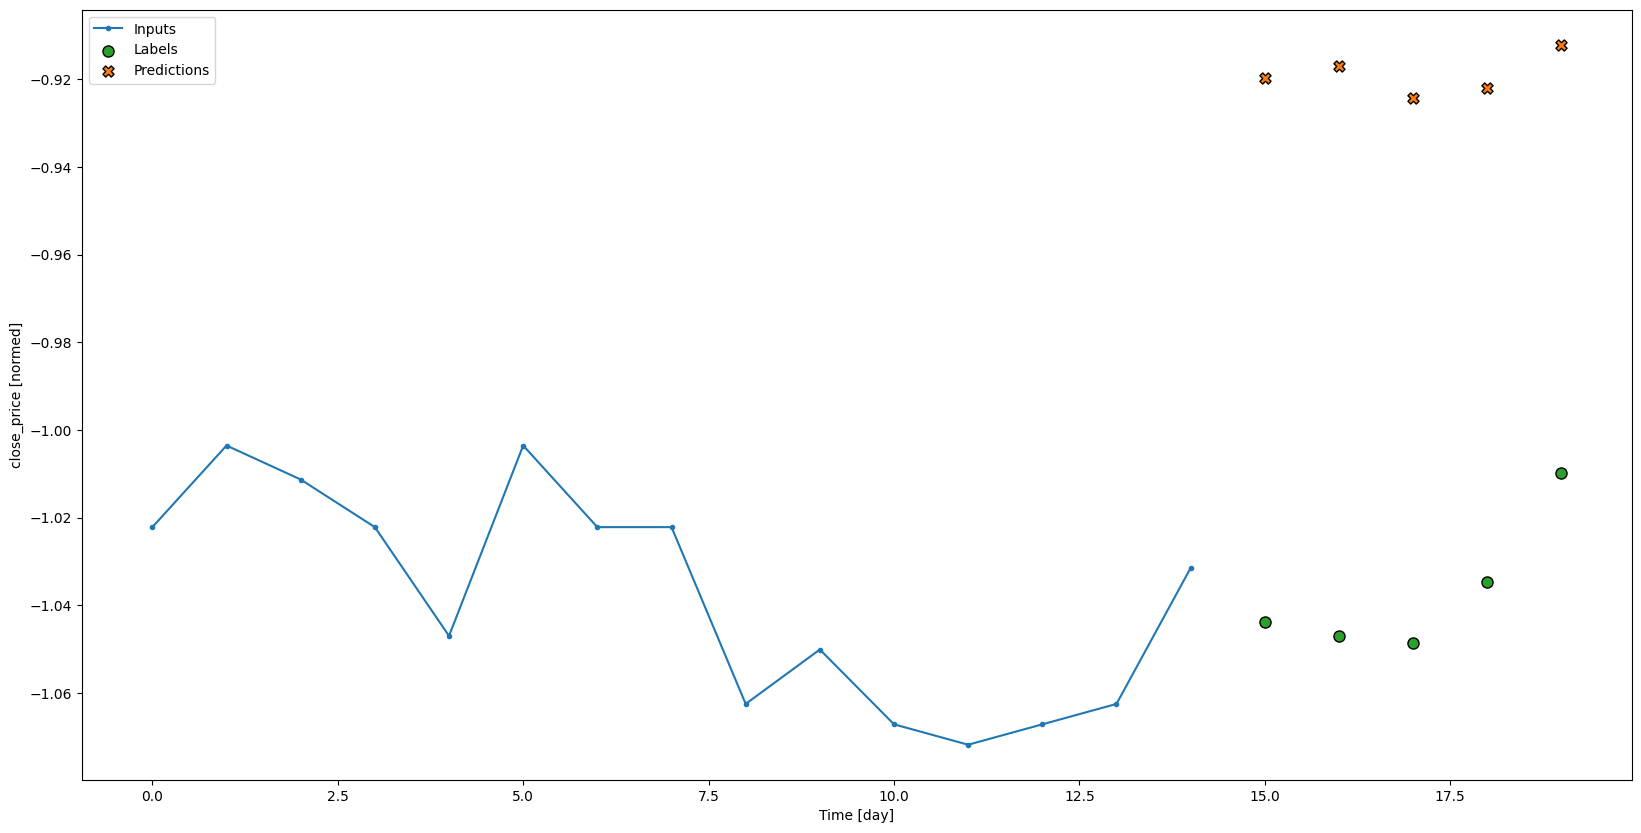

In [240]:
multi_window.plot_test(multi_lstm_model)
